# Anna Karenina Lookup

This is my first project working with understanding the process of clenaing text documents. I have chosen Anna Karenina as my text document. My goal is to build a phrase look up function that references the phrase as well as the location of the text in the chapter. 

This is the text that I am using:
http://www.gutenberg.org/files/1399/1399-h/1399-h.htm


## Breaking Up the text into chapters

The first step is to divide the entire text by chapters

In [6]:
import pickleshare
text_file= open("P:\Coursera\Complete-Python-Bootcamp-master\Final Capstone Projects\AnnaKarenina.txt","r")
lines = text_file.readlines()

print(lines[0:10])

['      The Project Gutenberg EBook of Anna Karenina, by Leo Tolstoy\n', '\n', '\n', 'This eBook is for the use of anyone anywhere at no cost and with almost\n', 'no restrictions whatsoever. You may copy it, give it away or re-use it\n', 'under the terms of the Project Gutenberg License included with this\n', 'eBook or online at http://www.gutenberg.org/license.\n', '\n', '\n', '\n']


In [7]:
## Remove the title and author names of the book
lines = lines[51:]
print(lines[0:10])

['Chapter 1\n', '\n', '\n', 'Happy families are all alike; every unhappy family is unhappy in its own\n', 'way.\n', '\n', "Everything was in confusion in the Oblonskys' house. The wife had\n", 'discovered that the husband was carrying on an intrigue with a French\n', 'girl, who had been a governess in their family, and she had announced to\n', 'her husband that she could not go on living in the same house with him.\n']


Since a chapter is noted on a new line, I created a list that noted the line index of all the chapters within the book

In [10]:
indices = [i for i, s in enumerate(lines) if 'Chapter' in s]
print 'Operations Completed'

Operations Completed


Splitting the document by chapters and saving each chapter as .txt file. After that, I reload the chapter documents into a dictionary

In [ ]:
for i in range(238):
    starting = indices[i]
    ending = indices[i+1]
    chapter = lines[starting:ending]
    new_file = open(str(i)+'.txt', 'w')
    for item in chapter:
        new_file.write("%s\n" % item)
print("completed")

In [26]:
import glob
chapter_paths = glob.glob('*.txt')
book = []
for files in chapter_paths:
    myfile = open(files,'r')
    data = myfile.read()
    data = data[10:]  ## Skip the empty row in chapter opening
    book.append(data.replace('\n', ' '))  ## replacing new row by empty space
    
## Create a dictionary of chapters 
chapter = list(range(1,239))
chapter = ["Chapter " + str(f) for f in chapter]
documents = dict(zip(chapter, book))


## Word Split, Removal of stop words, Lower case normalization

In [27]:
#setting up different cleaning and parsing functions 
_WORD_MIN_LENGTH = 3
_STOP_WORDS = frozenset([
'a', 'about', 'above', 'above', 'across', 'after', 'afterwards', 'again', 
'against', 'all', 'almost', 'alone', 'along', 'already', 'also','although',
'always','am','among', 'amongst', 'amoungst', 'amount',  'an', 'and', 'another',
'any','anyhow','anyone','anything','anyway', 'anywhere', 'are', 'around', 'as',
'at', 'back','be','became', 'because','become','becomes', 'becoming', 'been', 
'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 
'between', 'beyond', 'bill', 'both', 'bottom','but', 'by', 'call', 'can', 
'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de', 'describe', 
'detail', 'do', 'done', 'down', 'due', 'during', 'each', 'eg', 'eight', 
'either', 'eleven','else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 
'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 
'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for', 'former', 
'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get',
'give', 'go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her', 'here', 
'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'him', 
'himself', 'his', 'how', 'however', 'hundred', 'ie', 'if', 'in', 'inc', 
'indeed', 'interest', 'into', 'is', 'it', 'its', 'itself', 'keep', 'last', 
'latter', 'latterly', 'least', 'less', 'ltd', 'made', 'many', 'may', 'me', 
'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly', 
'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 
'nevertheless', 'next', 'nine', 'no', 'nobody', 'none', 'noone', 'nor', 'not', 
'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once', 'one', 'only',
'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out',
'over', 'own','part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 'same',
'see', 'seem', 'seemed', 'seeming', 'seems', 'serious', 'several', 'she', 
'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 'some', 
'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 
'still', 'such', 'system', 'take', 'ten', 'than', 'that', 'the', 'their', 
'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 
'therefore', 'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third',
'this', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 
'to', 'together', 'too', 'top', 'toward', 'towards', 'twelve', 'twenty', 'two', 
'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we', 'well', 
'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter',
'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which', 
'while', 'whither', 'who', 'whoever', 'whole', 'whom', 'whose', 'why', 'will', 
'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself',
'yourselves', 'the'])
def word_split(text):
    """
    Split a text in words. Returns a list of tuple that contains
    (word, location) location is the starting byte position of the word.
    """
    word_list = []
    wcurrent = []
    windex = None
    text = text.decode('latin-1')
    for i, c in enumerate(text):
        if c.isalnum():
            wcurrent.append(c)
            windex = i
        elif wcurrent:
            word = u''.join(wcurrent)
            word_list.append((windex - len(word) + 1, word))
            wcurrent = []
    if wcurrent:
        word = u''.join(wcurrent)
        word_list.append((windex - len(word) + 1, word))
    return word_list
 
    cleaned_words = []
    for index, word in words:
        if len(word) < _WORD_MIN_LENGTH or word in _STOP_WORDS:
            continue
        cleaned_words.append((index, word))
    return cleaned_words
def words_normalize(words):
    """
    Do a normalization precess on words. In this case is just a tolower(),
    but you can add accents stripping, convert to singular and so on...
    """
    normalized_words = []
    for index, word in words:
        wnormalized = word.lower()
        normalized_words.append((index, wnormalized))
    return normalized_words

### Combining all three processes into one generator
def word_index(text):
    """
    Just a helper method to process a text.
    It calls word split, normalize and cleanup.
    Output returns index of the word as well as the index of the word
    """
    words = word_split(text)
    words = words_normalize(words)
    #words = words_cleanup(words)
    return words

## Creating a Term Frequency-Inverse Document Frequency (TF-IDF) index


In [28]:
## these are the two generators needed to build TF-IDF:
def inverted_index(text):
    """
    Create an Inverted-Index of the specified text document.
        {word:[locations]}
    """
    inverted = {}
    for index, word in word_index(text):
        locations = inverted.setdefault(word, [])
        locations.append(index)
    return inverted


def inverted_index_add(inverted, doc_id, doc_index):
    """
    This genetaror builds on top of invert_index generator,
    It adds the document ID to build a 
    Multi-Document Inverted-Index (inverted), 
        {word:{doc_id:[locations]}}
    """
    for word, locations in doc_index.iteritems():
        indices = inverted.setdefault(word, {})
        indices[doc_id] = locations
    return inverted

In [29]:
## run a for loop to complete the index
inverted = {}
for doc_id, text in documents.iteritems():
    doc_index = inverted_index(text)
    inverted_index_add(inverted, doc_id, doc_index)

In [23]:
# Print some sample data
for i,data in enumerate(inverted.iteritems()):
    if i <3:
        print data

(u'raining', {'Chapter 65': [36], 'Chapter 75': [1970]})
(u'foul', {'Chapter 42': [6222], 'Chapter 107': [2312], 'Chapter 51': [1158], 'Chapter 183': [3493]})
(u'four', {'Chapter 54': [2924], 'Chapter 156': [1364], 'Chapter 152': [190], 'Chapter 51': [7555], 'Chapter 73': [9848], 'Chapter 112': [1540, 1579], 'Chapter 91': [291], 'Chapter 176': [1342], 'Chapter 115': [8324], 'Chapter 219': [569], 'Chapter 131': [4080], 'Chapter 153': [7686, 7825], 'Chapter 191': [5734], 'Chapter 196': [4094], 'Chapter 231': [803, 996], 'Chapter 174': [33, 2660], 'Chapter 49': [4595], 'Chapter 47': [4611, 10046], 'Chapter 88': [2539, 3287], 'Chapter 166': [8011], 'Chapter 81': [5885], 'Chapter 120': [3878], 'Chapter 101': [6616], 'Chapter 125': [3428], 'Chapter 173': [1080, 2580], 'Chapter 109': [8133], 'Chapter 108': [8933], 'Chapter 5': [17291], 'Chapter 222': [266], 'Chapter 1': [264], 'Chapter 9': [8], 'Chapter 77': [9006], 'Chapter 33': [76]})


## Various Application of TF-IDF

### 1. Search relevant quotes  

In [62]:
def search(inverted, query):
    """
    Returns a set of documents id that contains all the words in your query.
    """
    words = [word for _, word in word_index(query) if word in inverted]
    print words
    results = [set(inverted[word].keys()) for word in words]
    return reduce(lambda x, y: x & y, results) if results else []

In [100]:
final_result = search(inverted,'peasants')
print final_result

[u'peasants']
set(['Chapter 98', 'Chapter 99', 'Chapter 70', 'Chapter 71', 'Chapter 76', 'Chapter 51', 'Chapter 74', 'Chapter 73', 'Chapter 77', 'Chapter 175', 'Chapter 93', 'Chapter 94', 'Chapter 95', 'Chapter 96', 'Chapter 97', 'Chapter 139', 'Chapter 179', 'Chapter 192', 'Chapter 235', 'Chapter 233', 'Chapter 232', 'Chapter 231', 'Chapter 230', 'Chapter 75', 'Chapter 12', 'Chapter 174', 'Chapter 25', 'Chapter 26', 'Chapter 47', 'Chapter 46', 'Chapter 177', 'Chapter 169', 'Chapter 168', 'Chapter 167', 'Chapter 170', 'Chapter 162', 'Chapter 81', 'Chapter 80', 'Chapter 101', 'Chapter 200', 'Chapter 227', 'Chapter 186', 'Chapter 72', 'Chapter 14'])


In [101]:
def listing_results(queries):
    
    """ 
    This function builds on top of search generator:
    When given a list of queries, it will extract the location of the word
    If given a query that comes with two or more words, it will split into
    separate words and treat each as stand-alone query
    
    """
    for query in queries:
        result_docs = search(inverted, query)
        print "Search for '%s': %r" % (query, result_docs)
        for _, word in word_index(query):
            def extract_text(doc, index):
                # showing the the phrase from 30 characters before the key word to 60 characters after
                return documents[doc][index-30:index+60].replace('\n', ' ')
    
            for doc in result_docs:
                for index in inverted[word][doc]:
                    print '   - %s...' % extract_text(doc, index)
        print
    

For example:

In [102]:
sample_list = ['revolution','tsar','complicated']
listing_results(sample_list)


[u'revolution']
Search for 'revolution': set(['Chapter 99', 'Chapter 26', 'Chapter 221', 'Chapter 183'])
   - , was not merely to effect  a revolution in political economy, but to annihilate that scie...
   - erests. In short, a bloodless revolution, but a  revolution of the greatest magnitude, beg...
   -  bloodless revolution, but a  revolution of the greatest magnitude, beginning in the littl...
   - e him  think. He considered a revolution in economic conditions nonsense. But  he always f...
   - y, and if it did not cause a  revolution in social science it would, at any rate, make a g...
   - g and object of the  proposed revolution at the elections. The marshal of the province in ...

[u'tsar']
Search for 'tsar': set(['Chapter 192', 'Chapter 99', 'Chapter 63', 'Chapter 62', 'Chapter 145', 'Chapter 147', 'Chapter 222', 'Chapter 184', 'Chapter 59', 'Chapter 5', 'Chapter 18', 'Chapter 178', 'Chapter 150', 'Chapter 128'])
   - tered  on this subject by the Tsar and one of the ministe

### 2. Popularity Contest:

With TF-IDF, I can now determine the numbers of mention of each cahracter in the book:

In [106]:
character_list = ['Anna','Alexey']
listing_results(character_list)


[u'anna']
Search for 'Anna': set(['Chapter 156', 'Chapter 55', 'Chapter 56', 'Chapter 57', 'Chapter 152', 'Chapter 153', 'Chapter 52', 'Chapter 53', 'Chapter 58', 'Chapter 154', 'Chapter 159', 'Chapter 155', 'Chapter 157', 'Chapter 113', 'Chapter 123', 'Chapter 122', 'Chapter 121', 'Chapter 120', 'Chapter 124', 'Chapter 129', 'Chapter 131', 'Chapter 132', 'Chapter 133', 'Chapter 134', 'Chapter 135', 'Chapter 136', 'Chapter 137', 'Chapter 147', 'Chapter 84', 'Chapter 149', 'Chapter 43', 'Chapter 42', 'Chapter 41', 'Chapter 40', 'Chapter 45', 'Chapter 44', 'Chapter 105', 'Chapter 104', 'Chapter 107', 'Chapter 103', 'Chapter 102', 'Chapter 109', 'Chapter 108', 'Chapter 189', 'Chapter 188', 'Chapter 181', 'Chapter 180', 'Chapter 182', 'Chapter 38', 'Chapter 36', 'Chapter 32', 'Chapter 33', 'Chapter 30', 'Chapter 31', 'Chapter 118', 'Chapter 119', 'Chapter 90', 'Chapter 91', 'Chapter 92', 'Chapter 219', 'Chapter 218', 'Chapter 211', 'Chapter 213', 'Chapter 212', 'Chapter 215', 'Chapter 214'

In [118]:
def listing_results_counts(queries):
    
    """ 
    A reduced version of listing_results
    Displaying only the counts of occurences
    """
    counting_frequency = {}
    for query in queries:
        occurence_count = 0
        result_docs = search(inverted, query) ##-- identified document id
        for _, word in word_index(query):           
            for doc in result_docs:
                for index in inverted[word][doc]:
                    occurence_count +=1
        counting_frequency[query] = occurence_count
    return counting_frequency

In [122]:
results_first_name = listing_results_counts(character_list)

[u'anna']
[u'alexey']


In [123]:
last_name_list = ['Karenina','Alexandrovitch','Vronsky']
results_last_name = listing_results_counts(last_name_list)

[u'karenina']
[u'alexandrovitch']
[u'vronsky']


In [124]:
print results_first_name
print results_last_name

{'Alexey': 632, 'Anna': 822}
{'Alexandrovitch': 571, 'Vronsky': 862, 'Karenina': 38}


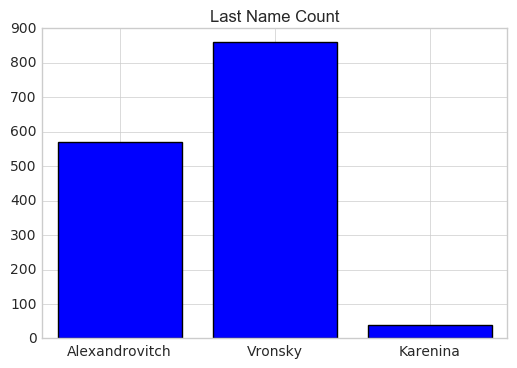

In [131]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

D = results_last_name
plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), D.keys())
plt.title('Last Name Count')

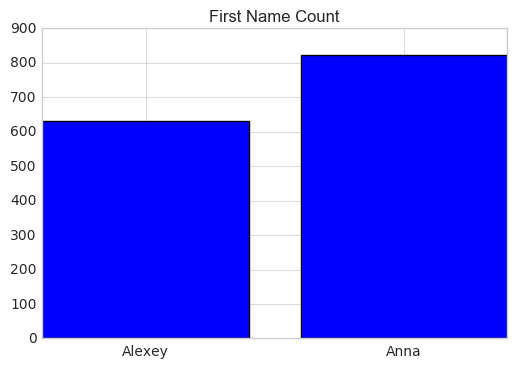

In [132]:
D = results_first_name
plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), D.keys())
plt.title('First Name Count')

## Observation:

The key comparison from here is that Anna Karenina is addressed most of the time as Anna, being referenced in conversations or called by her closed ones. Where as for her lover and husband, last name is usually referenced. But her husband, Alexey Alexandrovitch, the full name is often cited. Who is the main character in the book? It's actually interesting that Vronsky's mentions is slightly higher than Anna Kareinan's. However, we can think of it as - 1) Vronsky is mentioned frequenctly in Anna's words or 2) author uses the technique of describing Anna by painting a picture of surroundings including Vronsky. It would be an interesting next project to discover who talks in the most int he novel!